Задание

Цель: применить на практике базовые ансамблевые методы
Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.
10. Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.
Результат: получены знания по использованию базовых ансамблевых методов.

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('Data/heart.csv')

In [98]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [100]:
# категориальные переменные переведем в числовые
X = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'Oldpeak', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)
# столбец HeartDisease является целевой переменной, удаляем его из Х
del X['HeartDisease']
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,Oldpeak_5.6,Oldpeak_6.2,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [101]:
y = df['HeartDisease']

In [102]:
f = df.loc[df['HeartDisease'] == 1]
f.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


In [103]:
f1 = df.loc[df['HeartDisease'] == 0]
f1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [104]:
a = f['Cholesterol'].groupby(f['Age']).mean()
a = a.reset_index()
a

,Age,Cholesterol
0,31,270.000000
1,32,264.500000
2,33,246.000000
3,34,78.000000
4,35,184.250000
5,36,133.500000
6,37,207.000000
7,38,118.636364
8,39,249.500000
9,40,208.000000


In [105]:
b = f1['Cholesterol'].groupby(f1['Age']).mean()
b = b.reset_index()
b

,Age,Cholesterol
0,28,132.000000
1,29,236.666667
2,30,237.000000
3,31,219.000000
4,32,225.666667
5,33,298.000000
6,34,197.400000
7,35,205.000000
8,36,218.750000
9,37,236.400000


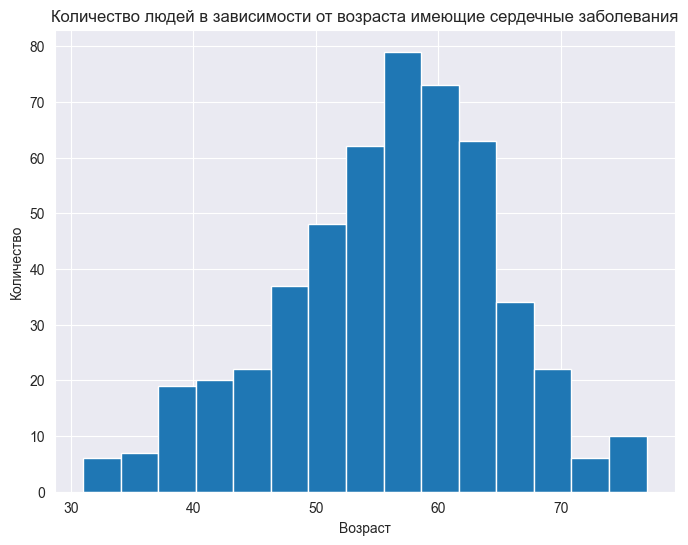

In [106]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(f['Age'], bins=15, density=False)
ax.set_ylabel("Количество")
ax.set_xlabel("Возраст")
ax.set_title("Количество людей в зависимости от возраста имеющие сердечные заболевания");

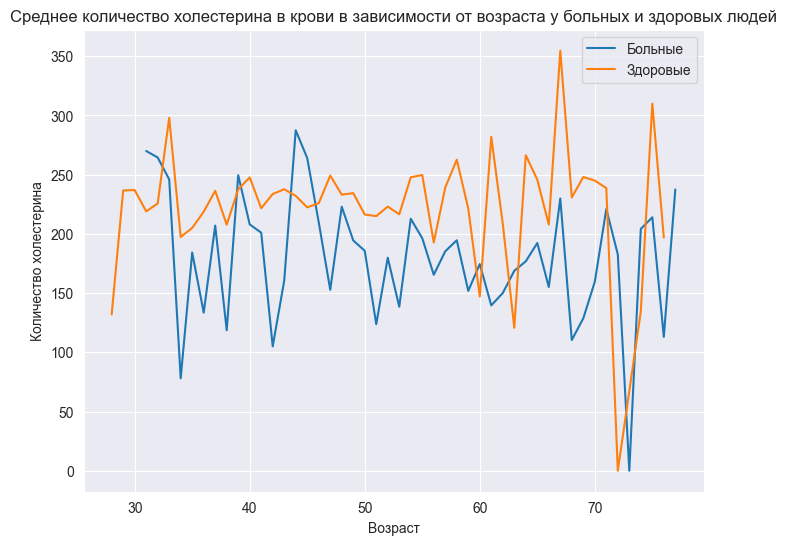

In [107]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(a['Age'], a['Cholesterol'], label='Больные')
ax.plot(b['Age'], b['Cholesterol'], label='Здоровые')
ax.set_ylabel("Количество холестерина")
ax.set_xlabel("Возраст")
ax.set_title("Среднее количество холестерина в крови в зависимости от возраста у больных и здоровых людей");
ax.legend()


Из графика замечаем, что у исследуемых людей в возрасте 72-73 лет нет данных о холестерине, чего не может быть, соответственно проверяем весь датасет.  

In [108]:
X.loc[X['Cholesterol'] == 0]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,Oldpeak_5.6,Oldpeak_6.2,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
293,65,115,0,0,93,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
294,32,95,0,1,127,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
295,61,105,0,1,110,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
296,50,145,0,1,139,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
297,57,110,0,1,131,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,122,0,0,120,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
515,63,130,0,1,160,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
518,48,102,0,1,110,0,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
535,56,130,0,0,122,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0


Замечаем, что у 172 человек нет данных о холестерине, что на таком небольшом датасете может существенно повлиять на результат, поэтому заполним пропуски среднем значением с разбиением на возрастные группы

In [109]:
for i, h in enumerate(X['Cholesterol']):
    if h == 0: 
        if X['Age'][i] < 30:
            X['Cholesterol'][i] = int(X['Cholesterol'].where((X['Age'] < 30)).mean())
        elif (30 <= X['Age'][i]) & (X['Age'][i] < 40):
            X['Cholesterol'][i] = int(X['Cholesterol'].where((30 <= X['Age']) & (X['Age'] < 40)).mean())
        elif (40 <= X['Age'][i]) & (X['Age'][i] < 50):
            X['Cholesterol'][i] = int(X['Cholesterol'].where((40 <= X['Age']) & (X['Age'] < 50)).mean())
        elif (50 <= X['Age'][i]) & (X['Age'][i] < 60):
            X['Cholesterol'][i] = int(X['Cholesterol'].where((50 <= X['Age']) & (X['Age'] < 60)).mean())
        elif (60 <= X['Age'][i]) & (X['Age'][i] < 70):    
            X['Cholesterol'][i] = int(X['Cholesterol'].where((60 <= X['Age']) & (X['Age'] < 70)).mean())
        else:
            X['Cholesterol'][i] = int(X['Cholesterol'].where(X['Age'] >= 70).mean())

In [110]:
X['Cholesterol'].notnull().value_counts()

Cholesterol
True    918
Name: count, dtype: int64

In [111]:
c = X['Cholesterol'].groupby(X['Age']).mean()
c = c.reset_index()

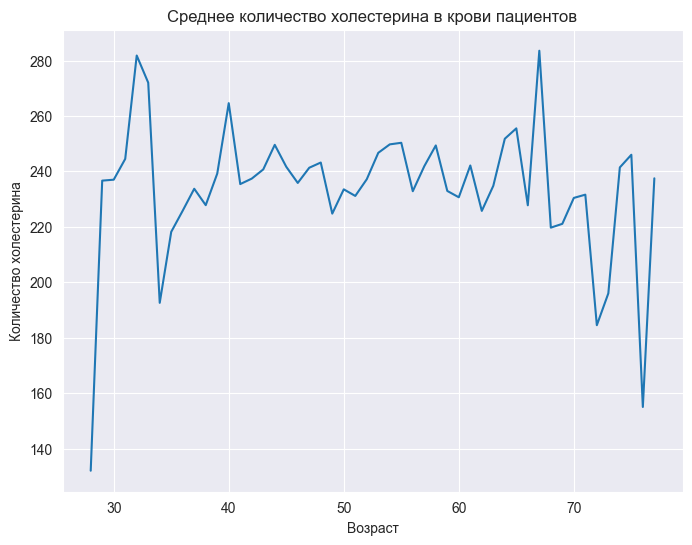

In [112]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(c['Age'], c['Cholesterol'])
# ax.plot(b['Age'], b['Cholesterol'], label='Здоровые')
ax.set_ylabel("Количество холестерина")
ax.set_xlabel("Возраст")
ax.set_title("Среднее количество холестерина в крови пациентов");

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим модели DecisionTreeClassifier и RandomForestClassifier

In [114]:
model_tree = DecisionTreeClassifier(random_state=42)

In [115]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
model_tree.score(X_train, y_train)

1.0

In [117]:
score_tree = model_tree.score(X_test, y_test)
score_tree

0.782608695652174

In [118]:
y_pred1 = model_tree.predict(X_test)
y_pred1

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [119]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184


In [120]:
model_rnd_tree = RandomForestClassifier(random_state=42)

In [121]:
model_rnd_tree.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
model_rnd_tree.score(X_train, y_train)

1.0

In [123]:
score_rnd_tree = model_rnd_tree.score(X_test, y_test)
score_rnd_tree

0.8641304347826086

In [124]:
y_pred2 = model_rnd_tree.predict(X_test)
y_pred2

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [125]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184


In [126]:
# Выявляем наиболее важные признаки и выводим на график. 

imp = pd.Series(model_rnd_tree.feature_importances_)

In [127]:
imp.index = pd.Series(X_train.columns)

In [128]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up      1.549124e-01
MaxHR            9.418351e-02
ST_Slope_Flat    8.488916e-02
Age              7.629442e-02
Cholesterol      6.554901e-02
                     ...     
Oldpeak_-0.9     6.317874e-07
Oldpeak_3.5      0.000000e+00
Oldpeak_-1.0     0.000000e+00
Oldpeak_-1.1     0.000000e+00
Oldpeak_-0.7     0.000000e+00
Length: 72, dtype: float64

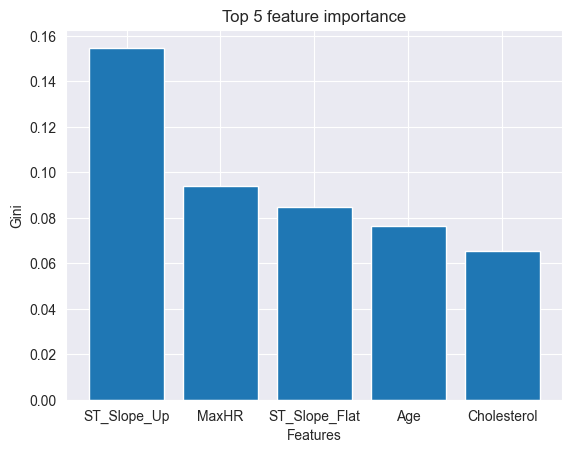

In [129]:
plt.title('Top 5 feature importance')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [130]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                           random_state=42)

In [131]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [132]:
bagging.score(X_train, y_train)

0.9863760217983651

In [133]:
score_b = bagging.score(X_test, y_test)
score_b

0.8097826086956522

In [134]:
y_pred3 = bagging.predict(X_test)
y_pred3

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        77
           1       0.92      0.74      0.82       107

    accuracy                           0.81       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.83      0.81      0.81       184


In [136]:
classifier = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
        ('LinearSVC', LinearSVC(random_state=42))
    ])

In [137]:
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(random_state=42)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=42)),
                               ('LinearSVC', LinearSVC(random_state=42))])

In [138]:
classifier.score(X_train, y_train)

0.9795640326975477

In [139]:
score_cl = classifier.score(X_test, y_test)
score_cl

0.8695652173913043

In [140]:
y_pred4 = classifier.predict(X_test)
y_pred4

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [141]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        77
           1       0.88      0.90      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


In [142]:
result = pd.DataFrame()
result['Model'] = ['DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'StackingClassifier']
result['Score'] = [score_tree, score_rnd_tree, score_b, score_cl]
result

,Model,Score
0,DecisionTreeClassifier,0.782609
1,RandomForestClassifier,0.864130
2,BaggingClassifier,0.809783
3,StackingClassifier,0.869565


По метрикам очевидно, что модель StackingClassifier лучшая из представленных в работе, но DecisionTreeClassifier не намного хуже, т.к. именно на ее основе и создавался StackingClassifier, параметры других моделей возможно улучшить за счет изменения настроек моделей, таких как глубина, количество листов, критерии остановки и др.